# Continuous-Time Dynamical Systems

## Introduction

We have discussed discrete-time dynamic call systems in previous projects, such as the may-fly model which applied the equation $x_{t+1} = b(1-x_t)x_t$ using generations an instance of discrete time in the form of $t \space \epsilon \space (0, 1, 2 ...).$ In other situations this "time-variable" is more naturally continuum-valued, or specifically, "real-valued" $(t \epsilon \mathbb {R})$. Time is continuous in regard to motion, thus when constructing the equation of motion, time cannot be speciied as a discrete variable. In the rate of change of state, the equation of motion will take on the following form: 

$$\frac{dx(t)}{dt} = f(x(t),t)$$

The above equation describes the rate of change of state of a point in space at any given time, in terms of the state at that moment. An autonomous equation $\frac{dx}{dt} = f(x)$ can be formulated through the application of knowledge and common sense. For example, with the radioactive decay of some quantity of uranium, it would be practical to assume that the rate of change will be proportional to the quantity of uranium present. Thus, resulting in the application of the equation $\frac{dx}{dt} = -kx$. When deducing the trajectory of planets in motion, a numerical method must be developed and applied to the differential equation in order to obtain a solution. 

Euler's method is an elementary numerical method for approximating the "true solution," or the estimated trajectory of planets, by solving a system of differential equations. The Euler method will iterate over the following formula:

$$X(t + \Delta t \approx X(t) + f(X(t)).\Delta t$$

Where the equation of motion is $\frac {dX}{dt} = f(X)$, which predicts how fast and in which direction a planet moves, Eulers method can be used to predict the state of a system, or the evolution of the state in time. The algorithm takes as input the equations, the length of time over which a solution is to be approximated (T), the number of steps desired for the approximation (n), and initial values of the four unknown functions (position, velocity and the $x$ and $y$ components of velocity).
 
The Euler method is intuitive, but lacks accuracy. Thus, we will be exploring improved methods when calculating the trajectory of a planet in orbit around one or more stars. These methods in question are the Improved Euler method and Runge-Kutta method. The Improved Euler method takes provisional steps in space from $X$ to $X + hf(X,t)$, in order to estimate minor changes in $f$. It takes an Euler step using the average of $f1$ and $f2$ instead of $f(X,t)$ and is represented in the following equation:

$$ X_{k+1} = X_{k} + h(\frac{fX_{K}t + f(X_{k} + f(X_{k}t_{k}), t_{k}+h}{2})$$

The Euler method is first order accurate which means the global error is $\approx$ $h$. The Improved Euler method has a global error of $\approx$ $h^2$. Meanwhile the Runge-Kutta method has global error of $\approx$ $h^4$, making it the most accurate method available to us. It approximates the solutions to a series of ordinary differential equations of the form $dy/dx=f(x,y),y(0)=y0$.

For our project, we will be exploring the most accurate method of obtaining planetary trajectory using an equation of motion which applies Newton's Laws and experimental procedures, in order to study the co-rotating planetary orbit of a planet orbiting two stars.

The first topic of our study is exploring the accuracy of the Euler Method, Improved Euler Method and the Runge-Kutta Method

We will begin by importing the modules and packages that will define and implement the functions, classes, or variables that will be used over the course of this report:

In [3]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

## The Euler Method

The Euler method, Improved Euler method and Runge-Kutta method will each be used to construct a geometric model of movement, by solving for  $ X = \begin{bmatrix} x \\ y \\ \end{bmatrix} $, where the exact or "true" solution is $ X(t) = \begin{bmatrix} Cos(t) \\ Sin(t) \\ \end{bmatrix} $. The points created by the Euler method will be deduced from a four dimensional space, using the equation of motion for predicting the speed of direction of each point, before mapping the location of each point onto a two-dimensional space. By predicting where a planet is in space, we will be able to figure out the state of the planet.

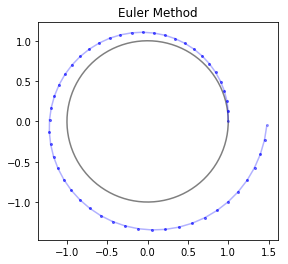

In [171]:
def f(X):
    x,y = X
    return array([-y,x])   # differential equation we are solving for, where dx/dt = -y , dy/dt = x.

def eulerstep(f,X,t,h):    # solving the differential equation using the Euler method 
    return X + f(X)*h      

X = array ([1.,0.])         # starting points of x and y in the 2 dimensional space
T = 2*pi                    # establishing the amount of time the system will run
n = 50                      # number of steps
h = T/n                     # time-step ("Delta-t")

plt.subplot(111,aspect=1)
rad = linspace(0,2*pi,300)
plt.plot(cos(rad), sin(rad), 'k', alpha=0.5)   # plot the true solution
plt.title("Euler Method", fontsize = 12)

for i in range(n):
    newX = eulerstep(f,X,t,h) #Euler step
    plt.plot([X[0], newX[0]],[X[1],newX[1]], 'bo-',ms=2,alpha=0.3)
    X = newX
    t = (i+1)*h
plt.show() 

In this graph we can see the points in space generated by the Euler method quickly deviate from the "true" solution and move further and further away from the correction solution. We can deduce from this graph that any planetary trajectory calculated using the Euler method has the potential to be wildly inaccurate since errors will begin to accumulate at each step, diverging the planet from its actual trajectory. This method is only being used as an introductory example.

We will discard this method from consideration and move on to the Improved Euler Method, which decreases the error by a factor of hundred by increasing the steps by a factor of ten. So if you need one hundred times more accuracy, you will have to take ten times as many steps to achieve it. In this way efficiency is dramatically improved with the Improved Euler Method.

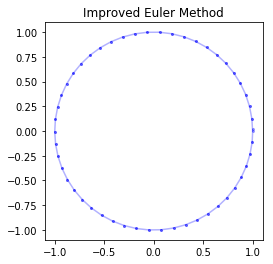

In [156]:
def f(X, t):
    x,y = X
    return array([-y,x])

def improved_eulerstep(f,X,t,h):
    f1 = f(X,t)
    X1 = X + f1*h
    f2 = f(X1, t+h)
    fav = (f1+f2)/2
    return X + h*fav

X = array ([1.,0.])
T = 2*pi                    # final  time we want to get to 
n = 50                      # number of steps
h = T/n                     # time-step ("Delta-t")

plt.plot(cos(rad), sin(rad), 'k', ms=2, alpha=0.3)  # plot the true solution
plt.subplot(111,aspect=1);
plt.title("Improved Euler Method", fontsize = 12)

for i in range(n):
    newX = improved_eulerstep(f,X,t,h)              # apply the Improved Euler step
    plt.plot([X[0], newX[0]],[X[1],newX[1]], 'bo-',ms=2,alpha=0.3)
    X = newX
    t = (i+1)*h
   # print(t,X)
plt.show()

The Improved Euler method is visibily much more accurate than the Euler method. The points in space being mapped along the true solution with a greater degree of precision, however, rather than a perfect circle they produce an eliptic shape due to the deviation of certain points. This leads us to finally move on to Runge-Kutta method.  

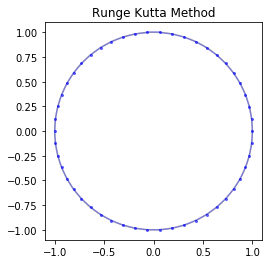

In [158]:
def f(X, t):
    x,y = X
    return array([-y,x])


X = array ([1.,0.])
T = 2*pi                    # final  time we want to get to 
n = 50                      # number of steps
h = T/n                     # time-step ("Delta-t")

def rk4(f,X,t,h):
    k1 = f(X,t)
    k2 = f(X + h*(k1/2), t + h/2)
    k3 = f(X + h*(k2/2), t + h/2)
    k4 = f(X + h*k3, t + h)
    return X + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

plt.subplot(111,aspect=1)
plt.plot(cos(rad), sin(rad), 'k', ms=2, alpha=0.3)   # plot the true solution
plt.title("Runge-Kutta Method", fontsize = 12)

for i in range(n):
    newX = rk4(f,X,t,h)                              # apply the Rung-Kutta Method
    plt.plot([X[0], newX[0]],[X[1],newX[1]], 'bo-',ms=2,alpha=0.3)
    X = newX
    t = (i+1)*h
plt.show()


This is decidely the most accurate method, with points falling along the true solution with the most accuracy. By reducing the step size by ten, this method achieves a hundred times more accuracy. Thus, it is the Runge-Kutta method we will put to use when estimating the trajectory of a planet orbiting either one or more stars at varying velocities. 

##  Newton's cannon & Planetary Orbit 

To explain how one body can orbit another, Isaac Newton used the metaphor of a cannon being launched from a tall mountain at varying velcoities to represent the projected trajectory taken by a planet orbiting a star. Newton's visualization of this cannonball takes into account the principle of circular motion, which requires the presence of a centripetal force. The larger the centripetal force, the faster the cannonball will move in a circular pattern of a certain size. The greater the projecting velocity of the cannonball, the farther it will go before it falls to the earth. According to Isaac Newton, the force of gravitational attraction between two objects (of mass $M_1$ and $M_2$) is given by: $F = G\frac{M_1M_2}{r^2}$. We will use principles deduced from Newton's cannonball experiment and his formulas for gravitation and acceleration to predict the trajectory of a planet orbiting two large stars, applying the equation of motion for a planet, which takes the form: $$\frac{d}{dt} \begin{bmatrix} x \\ y \\ u \\ v \end{bmatrix}= \frac{d}{dt} \begin{bmatrix} u \\ v \\ \frac{dy}{dt} \\ \frac{dv}{dt} \end{bmatrix} $$.

where $u$ and $v$ are the $x$ and $y$ coordinates of velocity. To begin with, we will consider one star of very large mass M, with one planet orbiting it. We will solve for the pattern of the trajectory at different velocities using the Runge-Kutta method in conjunction with Newton's Law. 


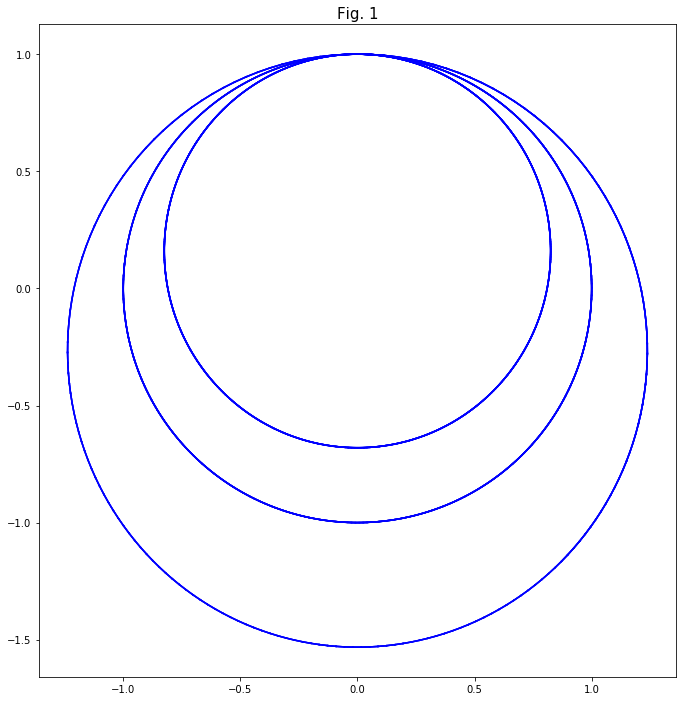

In [190]:
def f(X, t):
    G=1
    M=1
    x,y,u,v = X
    r = sqrt(x*x + y*y)
    r32 = r**3
    return array([u,v, -G*M*x/r32, -G*M*y/r32])
    

T = 30                                        # final  time we want to get to
h = .05
n = int(T/h)


plt.figure(figsize=(12,12))
plt.subplot(111,aspect=1)
plt.plot(cos(rad), sin(rad), 'k', alpha=0.5)  # the exact solution
plt.title("Fig. 1", fontsize = 15)

for u0 in [0.9,1.,1.1]:                       # four different initial x-coordinate velocities        
    X = array([0,1.,u0,0])                   
    for i in range(n):
        newX = rk4(f,X,t,h)   
        plt.plot([X[0], newX[0]],[X[1],newX[1]], 'b-')
        X = newX
        t = (i+1)*h
        #print(t,X)
plt.show()

Through this experiment we observe that the elipitical orbit of the planet increases in size with the increase in velocity. In $Fig. 1$ we can see that the moving planet experiences acceleration in the direction of the center of rotation due to a centripetal force. At the progressively increasing velocities of $0.9,1.0 and 1.1$, the planet takes larger eliptical orbits in relation to the center of mass. However, large these velocities the planet appear to remain in orbit given the centripetal force. 

We will continue this experiment between the planet and the star for higher initial velocities:

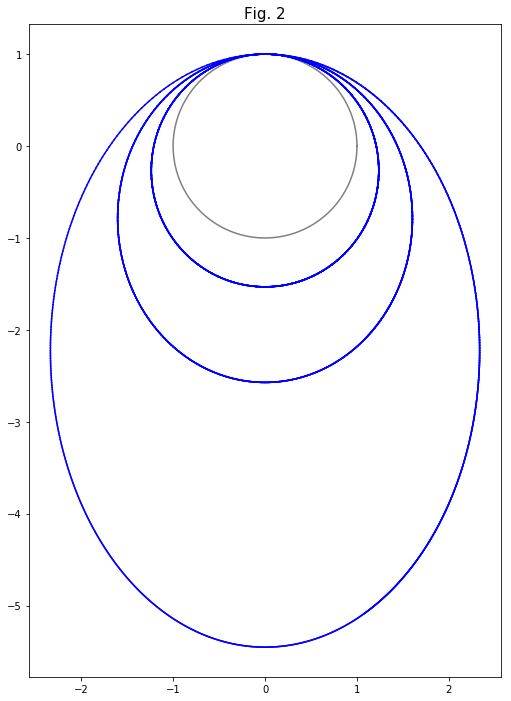

In [193]:
def f(X,t): 
    G = 1
    M = 1
    x,y,u,v = X
    r = sqrt(x*x + y*y)
    r32 = r**3
    return array([u,v,-G*M*x/r32,-G*M*y/r32])


T = 50                                 # final time we want to get to
h = .05
n = int(T/h)
plt.figure(figsize=(12,12))
plt.subplot(111,aspect=1)

t = linspace(0,2*pi,300)
plt.plot(cos(t),sin(t),'k',alpha=0.5)  # draw exact solution
plt.title("Fig. 2", fontsize = 15)

for u0 in [1.1,1.2,1.3]:               # three different intial x-coordinate velocities
    X = array([0,1.,u0,0])
    for i in range(n):
        newX = rk4(f,X,t,h)  
        plt.plot([X[0],newX[0]],[X[1],newX[1]],'b-')
        t = (i+1)*h
plt.show()

In $Fig. 2$ we see that with the increased velocities of $1.1,1.2 and 1.3$ the elliptical orbit of the planet is expanding even more, however it does not zoom off into infinity even at these higher speeds. The centripetal force keeps the planet in orbit of the star. The movement of the planet orbiting one star is predictable to certain extent, with the planet moving in a circular motion around the center of mass. If we were too add another planet of smaller mass ($M_2) to this experiment, it would shift the center of mass and would also make experiment much more interesting.

When two stars orbit each other, they were trace a circle around their center of mass, the center of mass being defined as $M_{1}(-R_{1})+M_{2}R_{2} = 0$. The center of mass will be closer to the more massive sun. Thus, the positions of the sun as functions of time will be $x_1=R_1 Coswt$, $y_1=R_1 Sinwt$, $x_2=-R_2 Coswt$ and $y_2=-R_2 Sinwt$, for some angular frequency $w$. The orbital period of two suns will be $2 \pi$, given $G=1$ and $w=1$. 

We will then apply the following equation of motion for a planet orbiting two stars:
$$\frac{d \begin{bmatrix} x \\ y \\ u \\ v \end{bmatrix}}{dt} = \begin{bmatrix} u \\ v \\ \frac{-GM_1(x-x_1)}{r_1^{3/2}} + \frac{-GM_2(x-x_2)}{r_2^{3/2}} \\ \frac{-GM_1(y-y_1)}{r_1^{3/2}} + \frac{-GM_2(y-y_2)}{r_2^{3/2}} \end{bmatrix}$$

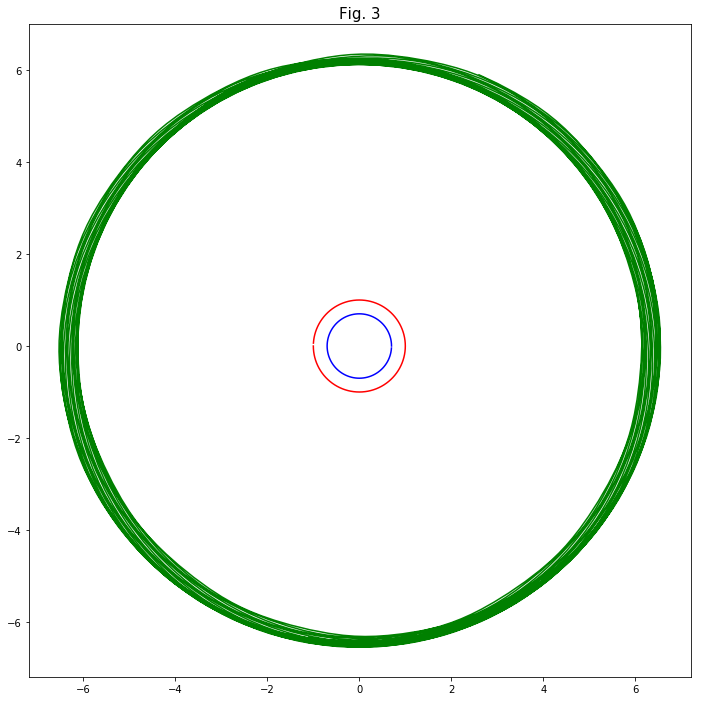

In [203]:
M1 = 0.7
M2 = 1-M1

R1 = M2
R2 = M1
G = 1
n = 2000

def f(X,t): 
    x,y,u,v = X
    x1 = R1*cos(t)
    y1 = R1*sin(t)
    x2 = -R2*cos(t)
    y2 = -R2*sin(t)
    s1 = sqrt((x-x1)**2 + (y-y1)**2)
    s2 = sqrt((x-x2)**2 + (y-y2)**2)
    S1 = s2**3
    S2 = s2**3
    return array([u, v,-G*M1*(x-x1)/S1 -G*M2*(x-x2)/S2, -G*M1*(y-y1)/S1 -G*M2*(y-y2)/S2])


t = 0
G = 1
M = 1
x0 = 0
y0 = 15                       # distance from center of mass
u0 = -sqrt(G*M/y0)            # velocity of planet
v0 = 0
c = 0.02                       # constant determining step-size 
orbittime = 2*pi*y0**(3/2)
T = 5*orbittime               # number of orbits

tlist = []
xlist = []
ylist = []

while t < T:
    xlist.append(X[0])
    ylist.append(X[1])
    tlist.append(t)
    a = linalg.norm(f(X,t)[2:])      # acceleration
    h = c/a                          # step-size
    newX =  rk4(f,X,t,h)        
    X = newX
    t +=h
plt.show()

plt.figure(figsize=(12,12));
ax = plt.subplot(111,aspect=1);
plt.title("Fig. 3", fontsize = 15)
plt.plot(xlist,ylist, 'g');          #plot orbit of the planet
ax.plot(x1,y1,'b');                  #plot star 1
ax.plot(x2,y2,'r');                  #plot star 2

The above $Fig. 3$ displays a planet orbiting the two stars at a very large distance. The large distance from the two orbiting stars appears to have resulted in a stable orbit for the planet. However, the thickness of the green line shows us certain variations in the eliptical motion of this planet. Overall, the trajectory of the planet's orbit is fairly predictable, but at this distance the stars appear to be perceived as a single gravitational force to the planet which is very far from their center of mass.  

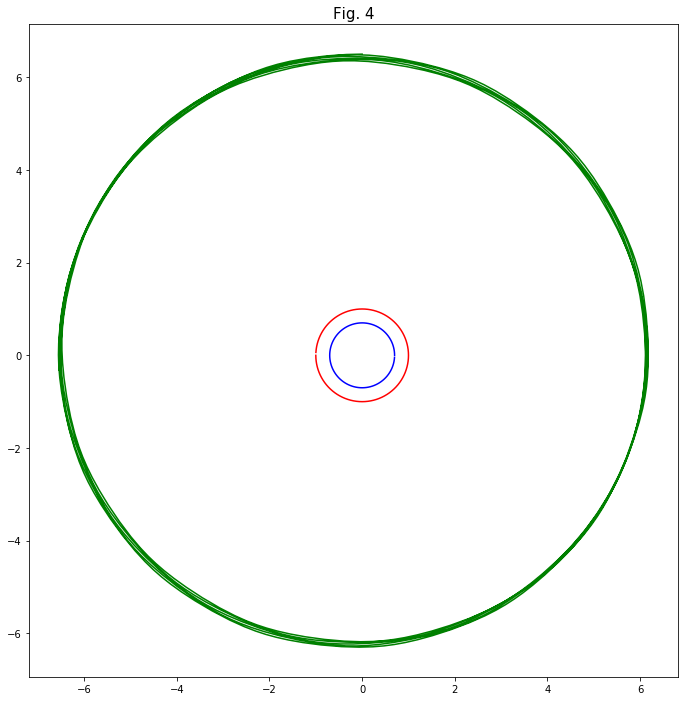

In [226]:
M1 = 0.7
M2 = 1-M1

R1 = M2
R2 = M1
n = 2000

def f(X,t): 
    x,y,u,v = X
    x1 = R1*cos(t)
    y1 = R1*sin(t)
    x2 = -R2*cos(t)
    y2 = -R2*sin(t)
    s1 = sqrt((x-x1)**2 + (y-y1)**2)
    s2 = sqrt((x-x2)**2 + (y-y2)**2)
    S1 = s2**3
    S2 = s2**3
    return array([u, v,-G*M1*(x-x1)/S1 -G*M2*(x-x2)/S2, -G*M1*(y-y1)/S1 -G*M2*(y-y2)/S2])

                   
t = 0
G = 1
M = 1
x0 = 0
y0 = 6.5               # distance from center
u0 = -sqrt(G*M/y0)    
v0 = 0
c = 0.02
orbittime = 2*pi*y0**(3/2)
T = 5*orbittime 

X = array([x0,y0,u0,v0])

tlist = []
xlist = []
ylist = []

while t < T:
    xlist.append(X[0])
    ylist.append(X[1])
    tlist.append(t)
    a = linalg.norm(f(X,t)[2:])
    h = c/a
    newX =  rk4(f,X,t,h)           
    X = newX
    t +=h
plt.show()

plt.figure(figsize=(12,12));
ax = plt.subplot(111,aspect=1);
plt.title("Fig. 4", fontsize = 15)
plt.plot(xlist,ylist, 'g');
ax.plot(x1,y1,'b');
ax.plot(x2,y2,'r');

In $Fig. 4$, the planet is orbiting closer to the stars and the reduced thickness of the green line shows us the planet moves in a more predictable trajectory. At this distance the planet still appears to be far enough to perceive both stars as one gravitional force. However, the gravitational pull these stars exert on the planet must be far greater due to the minimal variance in the nature of the elipses. 

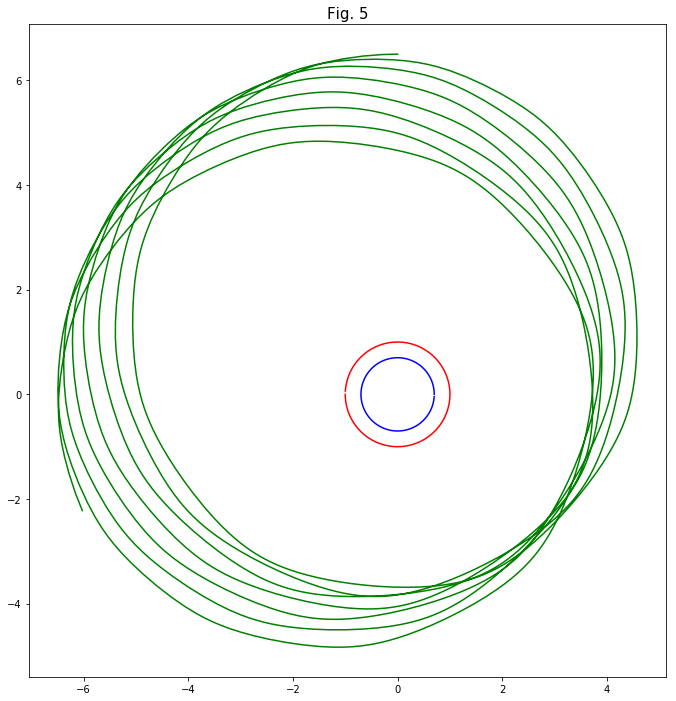

In [227]:
M1 = 0.7
M2 = 1-M1

R1 = M2
R2 = M1
G = 1
n = 2000

def f(X,t): 
    x,y,u,v = X
    x1 = R1*cos(t)
    y1 = R1*sin(t)
    x2 = -R2*cos(t)
    y2 = -R2*sin(t)
    s1 = sqrt((x-x1)**2 + (y-y1)**2)
    s2 = sqrt((x-x2)**2 + (y-y2)**2)
    S1 = s2**3
    S2 = s2**3
    return array([u, v,-G*M1*(x-x1)/S1 -G*M2*(x-x2)/S2, -G*M1*(y-y1)/S1 -G*M2*(y-y2)/S2])

                   
t = 0
G = 1
M = 1
x0 = 0
y0 = 6.5                        # distance from center
u0 = -sqrt(G*M/y0) + 0.05       # altered velocity
v0 = 0
c = 0.02
orbittime = 2*pi*y0**(3/2)
T = 5*orbittime 

X = array([x0,y0,u0,v0])

tlist = []
xlist = []
ylist = []

while t < T:
    xlist.append(X[0])
    ylist.append(X[1])
    tlist.append(t)
    a = linalg.norm(f(X,t)[2:])
    h = c/a
    newX =  rk4(f,X,t,h)            
    X = newX
    t +=h
plt.show()

plt.figure(figsize=(12,12));
ax = plt.subplot(111,aspect=1);
plt.title("Fig. 5", fontsize = 15)
plt.plot(xlist,ylist, 'g');
ax.plot(x1,y1,'b');
ax.plot(x2,y2,'r');

In $Fig. 5$ the planet is kept at the same distance from the stars, however, we have increased the velocity of the planet's motion in the x-direction in proportion to the distance from the center of mass. This has resulted in an interesting eliptical pattern, which causes the planet to spiral around the stars at varying distances with each orbital period. The elipses themselves are not entirely symmetrical with considerable instability in the planet's orbit. 

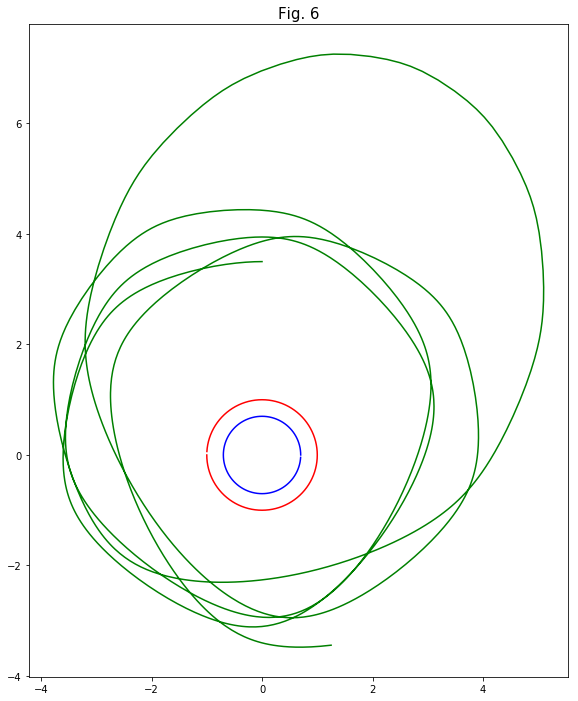

In [228]:
M1 = 0.7
M2 = 1-M1

R1 = M2
R2 = M1
G = 1
n = 2000

def f(X,t): 
    x,y,u,v = X
    x1 = R1*cos(t)
    y1 = R1*sin(t)
    x2 = -R2*cos(t)
    y2 = -R2*sin(t)
    s1 = sqrt((x-x1)**2 + (y-y1)**2)
    s2 = sqrt((x-x2)**2 + (y-y2)**2)
    S1 = s2**3
    S2 = s2**3
    return array([u, v,-G*M1*(x-x1)/S1 -G*M2*(x-x2)/S2, -G*M1*(y-y1)/S1 -G*M2*(y-y2)/S2])

                   
t = 0
G = 1
M = 1
x0 = 0
y0 = 3.5                      # distance from center
u0 = -sqrt(G*M/y0) +0.0055
v0 = 0
c = 0.02    
orbittime = 2*pi*y0**(3/2)
T = 5*orbittime 

X = array([x0,y0,u0,v0])

tlist = []
xlist = []
ylist = []
while t < T:
    xlist.append(X[0])
    ylist.append(X[1])
    tlist.append(t)
    a = linalg.norm(f(X,t)[2:])     # acceleration
    h = c/a                         # step size
    newX =  rk4(f,X,t,h)           
    X = newX
    t +=h
plt.show()

plt.figure(figsize=(12,12));
ax = plt.subplot(111,aspect=1);
plt.title("Fig. 6", fontsize = 15)
plt.plot(xlist,ylist, 'g');
ax.plot(x1,y1,'b');
ax.plot(x2,y2,'r');

In $Fig. 6$ we generate a plot with the planet even closer to the two stars and a slightly greater altered velocity. This plot contains the most inconsistent orbital trajectory we have observed for the planet so far. By trial and error this is the most irregular trajectory I could produce while ensuring the planet did not break free from the gravitational pull of the two stars and shoot into infinity. The inconsistent pattern might be due to the two stars each exerting varying levels of gravitional pull, while rotating around their center of mass.

We will proceed to animate this orbital plane to better understand nature of co-rotating planetary objects:

We will first import the packages necessary for running the animation:

In [129]:
from matplotlib import animation
from IPython.display import HTML

In [229]:
skip = 10           # reducing the number of steps in order to allow the animation to run without crashing

shtlist = tlist[::skip]
shylist = ylist[::skip]
shxlist = xlist[::skip]

def init():
    return star1,star2, planet

def animate(i): # plot ith frame
    star1.set_data(R1*cos(shtlist[i]),R1*sin(shtlist[i]))
    star2.set_data(-R2*cos(shtlist[i]),-R2*sin(shtlist[i]))
    planet.set_data(shxlist[i],shylist[i])
    return star1,star2,star3

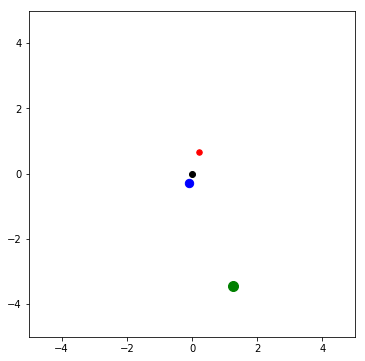

In [230]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111,aspect=1)
origin = ax.plot(0,0,'ko')                       # plotting the center point 
star1, = ax.plot([],[],'bo',ms=10*sqrt(M1))      # plotting star 3
star2, = ax.plot([],[],'ro',ms=10*sqrt(M2))      # plotting star 2
planet, = ax.plot([],[],'go',ms=10)              # plotting the planet
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=len(shtlist),interval=5,blit=True)
HTML(anim.to_jshtml())

A body in motion will have a velocity dependent on the body's speed and its direction of travel. In this animation we observe the movement of the planet slowing down and speeding up at different points in the loop- this is due to variation in the step-size during the execution of the program. We observe that the planet will speed up and slow at different points in the orbital period, however, the variations in acceleration should not be deduced from this animation, since we know that the planet should theoreticaly speed up when it is closer to the gravitional pull of the planets and slow down when it is further away.

## Conclusion

In conclusion, we have observed that the further a planet is from the two stars it will no longer perceive the gravitational pull from each star individually, but instead will orbit the two stars as if they were one large planetary body. The most uniform orbital movement from the planet was observed when the planet was closer to the stars, but still far enough to perceive both as one gravitional pull. As the planet gets closer to the stars, the eliptical orbit of the planet becomes increasingly unpredictable as the gravitational pull of each star begins to influence the planet's orbit. Increased velocity can cause the planet to move in a varying pattern of eliptical orbits as it influences the acceleration by centripetal force. The stars continued to move in a consistent pattern, rotating around their center of mass at each experimental step.  

## References:

-Dennis Overbye, NASA Detects Planet Dancing with Pair of Stars. https://www.nytimes.com/2011/09/16/science/space/16planet.html, seen 4/20/18.